In [59]:
import pandas as pd
import numpy as np
import os
import numpy as np
from numpy import random
from numpy import random
from numpy .linalg import inv
import os
import pandas as pd
import scipy 
from scipy import stats
from scipy.stats import skew , kurtosis
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import binom 
from scipy.stats import poisson
from scipy.stats import poisson , norm
import seaborn as sns

from scipy.stats import expon
from scipy.stats import t

In [21]:
os.getcwd()

'C:\\Users\\Jerry\\Desktop\\CAR_EDA'

In [22]:
df = pd.read_csv('used_cars_data.csv')

In [23]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [25]:
df.isna().value_counts()

S.No.  Name   Location  Year   Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  Engine  Power  Seats  New_Price  Price
False  False  False     False  False              False      False         False       False    False   False  False  True       False    5152
                                                                                                                                 True     1041
                                                                                                                      False      False     823
                                                                                                                                 True      182
                                                                                                True    True   True   True       False      36
                                                                                                                                 True       10
       

In [26]:
df.shape

(7253, 14)

In [27]:
df.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [28]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

# Data Cleaning and Preprocessing

In [33]:
df['Mileage'] = df['Mileage'].astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float)
df['Engine'] = df['Engine'].astype(str).str.extract(r'(\d+)').astype(float)
df['Power'] = df['Power'].astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float)


In [34]:
df['New_Price'] = df['New_Price'].str.replace(' Lakh', '').str.replace(' Cr', '')

In [ ]:
df['New_Price'] = np.where(df['New_Price'].str.contains('Cr', na=False),df['New_Price'].astype(float)*100

In [35]:
df['New_Price'] = np.where(df['New_Price'].str.contains('Cr', na=False), 
                           df['New_Price'].astype(float) * 100, 
                           df['New_Price'])

In [36]:
df['New_Price'] = pd.to_numeric(df['New_Price'], errors='coerce')

In [37]:
df = df.drop_duplicates()

# Descriptive Statistics

In [38]:
df.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,7253.000000,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.279722,19.894324,9.479468
std,2093.905084,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.811660,19.813947,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,1.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.635000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.270000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,23.640000,9.950000
max,7252.000000,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,99.920000,160.000000


In [39]:
categorical_cols = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']

In [40]:
for col in categorical_cols:
    print(f"\n{col} value counts:\n", df[col].value_counts())


Fuel_Type value counts:
 Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64

Transmission value counts:
 Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64

Owner_Type value counts:
 Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64

Location value counts:
 Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64


# Visual Explorations

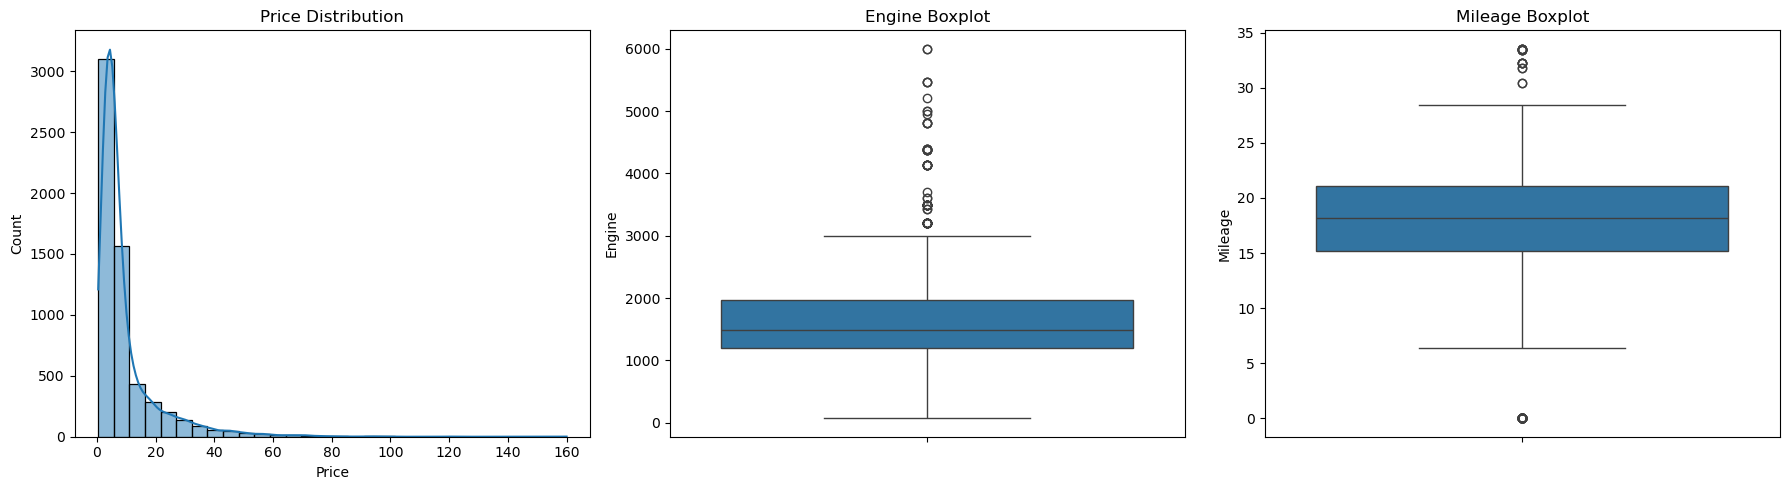

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Price'], bins=30, ax=axes[0], kde=True)
axes[0].set_title("Price Distribution")
sns.boxplot(y=df['Engine'], ax=axes[1])
axes[1].set_title("Engine Boxplot")
sns.boxplot(y=df['Mileage'], ax=axes[2])
axes[2].set_title("Mileage Boxplot")
plt.tight_layout()
plt.show()

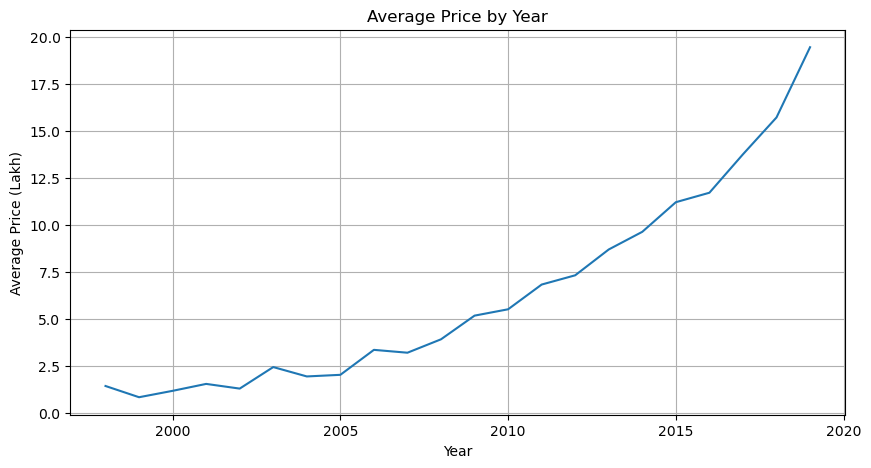

In [49]:
# Price over Years
yearly_avg = df.groupby('Year')['Price'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values)
plt.title("Average Price by Year")
plt.ylabel("Average Price (Lakh)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

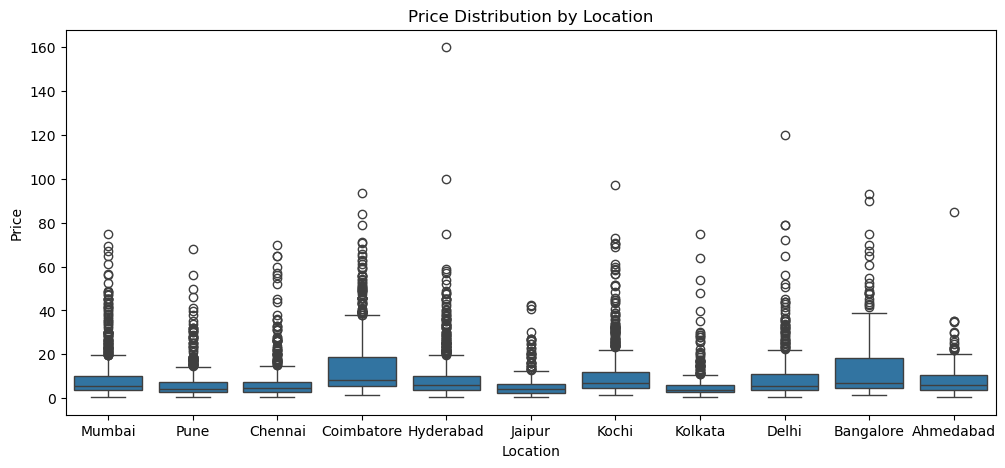

In [51]:
# Price vs Location and Fuel Type
plt.figure(figsize=(12,5))
sns.boxplot(x='Location', y='Price', data=df)
plt.title("Price Distribution by Location")
plt.show()

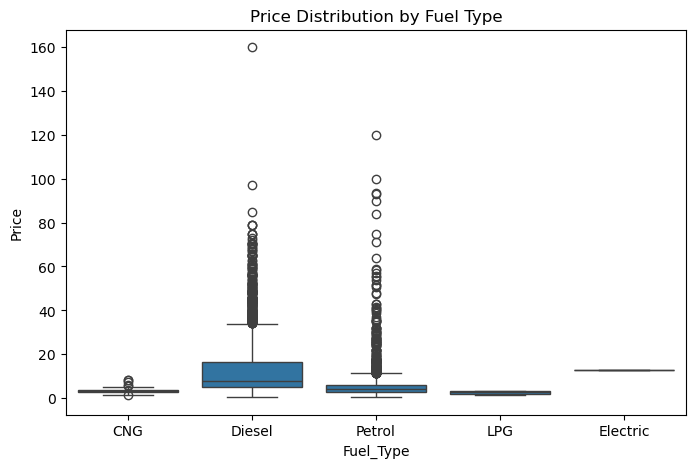

In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title("Price Distribution by Fuel Type")
plt.show()

# Correlation & Relationships

In [54]:
correlation_matrix = df.corr(numeric_only=True)
print("Correlation with Price:\n")
print(correlation_matrix['Price'].sort_values(ascending=False))


Correlation with Price:

Price                1.000000
Power                0.772566
New_Price            0.686588
Engine               0.658354
Year                 0.305327
Seats                0.052225
Kilometers_Driven   -0.011493
S.No.               -0.020275
Mileage             -0.306593
Name: Price, dtype: float64


In [55]:
features = ['Mileage', 'Engine', 'Power', 'Kilometers_Driven']

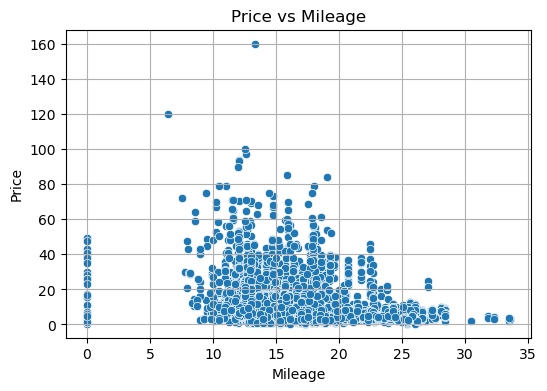

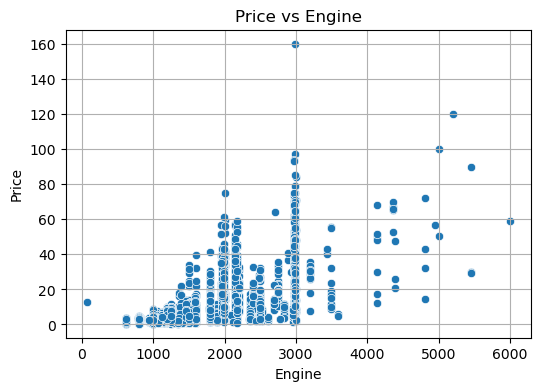

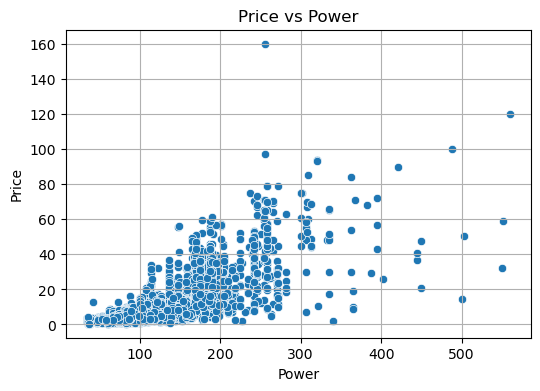

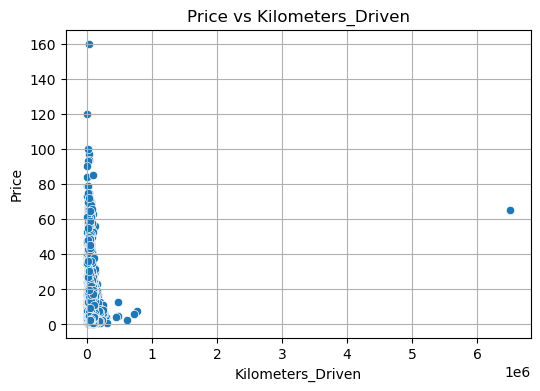

In [56]:
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['Price'])
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

In [57]:
for feature in features:
    corr = df[[feature, 'Price']].corr().iloc[0, 1]
    print(f'Correlation between {feature} and Price: {corr:.2f}')

Correlation between Mileage and Price: -0.31
Correlation between Engine and Price: 0.66
Correlation between Power and Price: 0.77
Correlation between Kilometers_Driven and Price: -0.01


#
---
Multivariate: Transmission and Fuel_Type vs Price

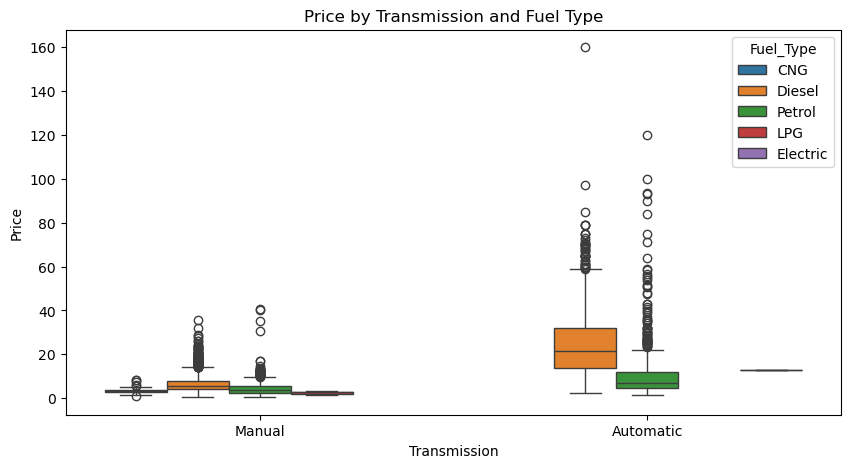

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Transmission', y='Price', hue='Fuel_Type', data=df)
plt.title("Price by Transmission and Fuel Type")
plt.show()

# Outlier Detection

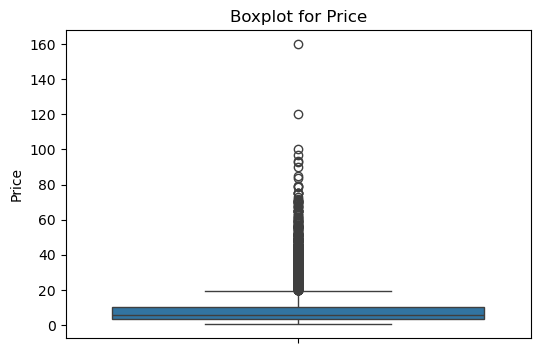

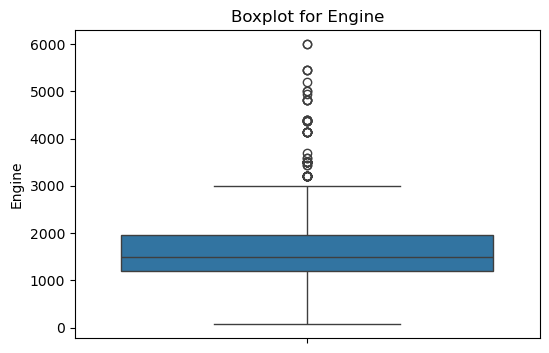

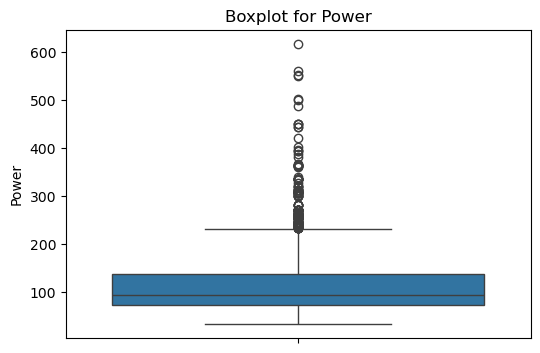

In [61]:
for col in ['Price', 'Engine', 'Power']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot for {col}')
    plt.show()

# Insights & Trends

In [62]:
print("\nMost Expensive Cars:\n", df[['Name', 'Price']].sort_values(by='Price', ascending=False).head())
print("\nLeast Expensive Cars:\n", df[['Name', 'Price']].sort_values(by='Price').head())


Most Expensive Cars:
                                              Name   Price
4079  Land Rover Range Rover 3.0 Diesel LWB Vogue  160.00
5781                   Lamborghini Gallardo Coupe  120.00
5919                       Jaguar F Type 5.0 V8 S  100.00
1505              Land Rover Range Rover Sport SE   97.07
1974                           BMW 7 Series 740Li   93.67

Least Expensive Cars:
                       Name  Price
1713          Tata Nano Lx   0.44
2847      Hyundai Getz GLS   0.45
1628  Maruti 800 Std BSIII   0.45
3138        Maruti Zen LXI   0.45
3228        Maruti 800 Std   0.50


In [63]:
print("\nAverage Price by Owner Type:\n", df.groupby('Owner_Type')['Price'].mean())


Average Price by Owner Type:
 Owner_Type
First             9.962445
Fourth & Above    3.280000
Second            7.599886
Third             5.007257
Name: Price, dtype: float64


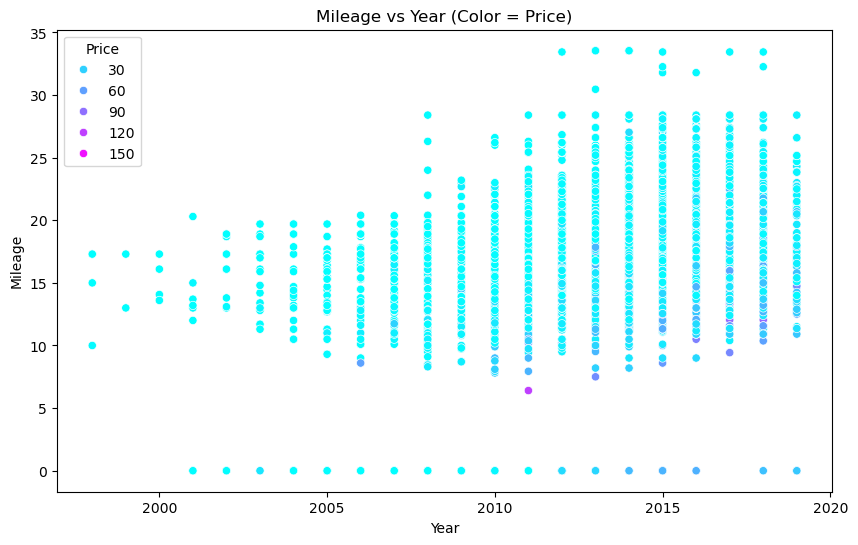

In [64]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Year', y='Mileage', hue='Price', data=df, palette='cool')
plt.title("Mileage vs Year (Color = Price)")
plt.show()